In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 1. Load the data
base_data = pd.read_csv("Wine.csv")

In [33]:
# Display the structure of the dataset
print(base_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         4898 non-null   float64 
 1   volatile acidity      4898 non-null   float64 
 2   citric acid           4898 non-null   float64 
 3   residual sugar        4898 non-null   float64 
 4   chlorides             4898 non-null   float64 
 5   free sulfur dioxide   4898 non-null   float64 
 6   total sulfur dioxide  4898 non-null   float64 
 7   density               4898 non-null   float64 
 8   pH                    4898 non-null   float64 
 9   sulphates             4898 non-null   float64 
 10  alcohol               4898 non-null   float64 
 11  quality               4898 non-null   int64   
 12  Des_Qual              4898 non-null   category
dtypes: category(1), float64(11), int64(1)
memory usage: 464.2 KB
None


In [7]:
# 2. Consider quality score 7+ as desired quality (Des_Qual = Y), rest as N.
# Create a new column 'Des_Qual'
base_data['Des_Qual'] = np.where(base_data['quality'] >= 7, 'Y', 'N')

In [35]:
print(base_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         4898 non-null   float64 
 1   volatile acidity      4898 non-null   float64 
 2   citric acid           4898 non-null   float64 
 3   residual sugar        4898 non-null   float64 
 4   chlorides             4898 non-null   float64 
 5   free sulfur dioxide   4898 non-null   float64 
 6   total sulfur dioxide  4898 non-null   float64 
 7   density               4898 non-null   float64 
 8   pH                    4898 non-null   float64 
 9   sulphates             4898 non-null   float64 
 10  alcohol               4898 non-null   float64 
 11  quality               4898 non-null   int64   
 12  Des_Qual              4898 non-null   category
dtypes: category(1), float64(11), int64(1)
memory usage: 464.2 KB
None


In [37]:
# Convert to categorical
base_data['Des_Qual'] = base_data['Des_Qual'].astype('category')

In [39]:
# 3. Find the distribution of quality and Des_Qual.

# Distribution of quality
print(base_data['quality'].value_counts())

# Distribution of Des_Qual
print(base_data['Des_Qual'].value_counts())

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64
Des_Qual
N    3838
Y    1060
Name: count, dtype: int64


In [41]:
# 4. Develop a classification tree using DecisionTreeClassifier with set seed.
from sklearn.model_selection import train_test_split

# Set seed for reproducibility
np.random.seed(100)

# Splitting data into train and test
X = base_data.drop(['Des_Qual'], axis=1)
y = base_data['Des_Qual']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# Build the classification tree model
clf = DecisionTreeClassifier(min_samples_split=60, min_samples_leaf=30, max_depth=4, random_state=100)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=30, min_samples_split=60,
                       random_state=100)

In [43]:
# 5. Print model summary (for Python, we look at the tree structure directly)
print("Feature importances:", clf.feature_importances_)
print("Classes:", clf.classes_)

Feature importances: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Classes: ['N' 'Y']


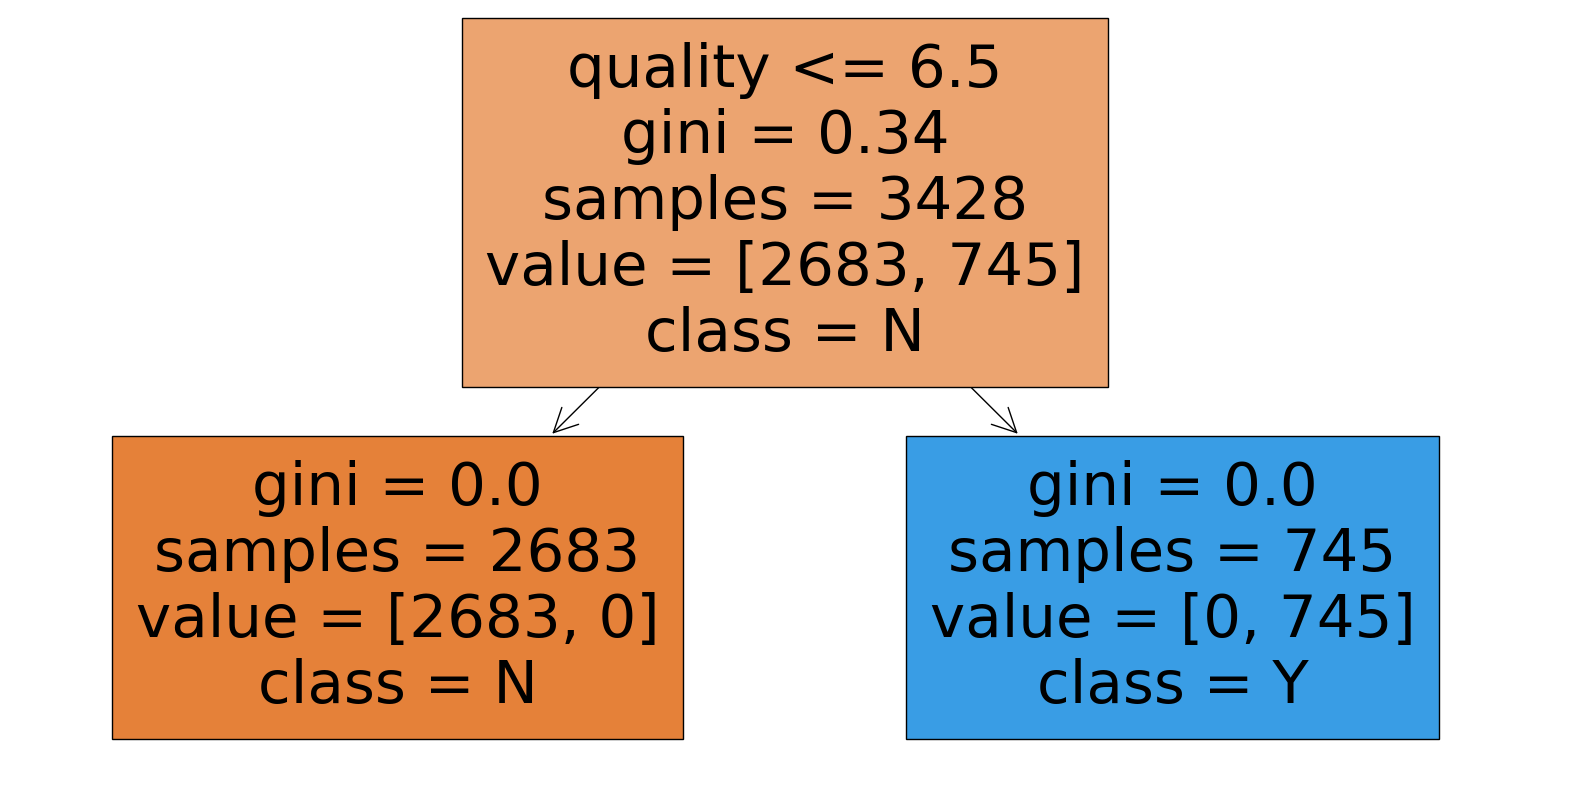

In [45]:
# 6. Plot the tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=clf.classes_)
plt.show()

In [47]:
# 7. Print the tree's structure (splits and complexity parameters)
print("Tree complexity parameter and splits:")
print("Number of leaf nodes:", clf.get_n_leaves())

Tree complexity parameter and splits:
Number of leaf nodes: 2


In [54]:
# 9. The maximum number of leaf nodes for depth 4
max_leaves = 2 ** 4
print("Maximum number of leaf nodes possible for depth 4:", max_leaves)

Maximum number of leaf nodes possible for depth 4: 16
